
# DMT 2023 - Homework 4

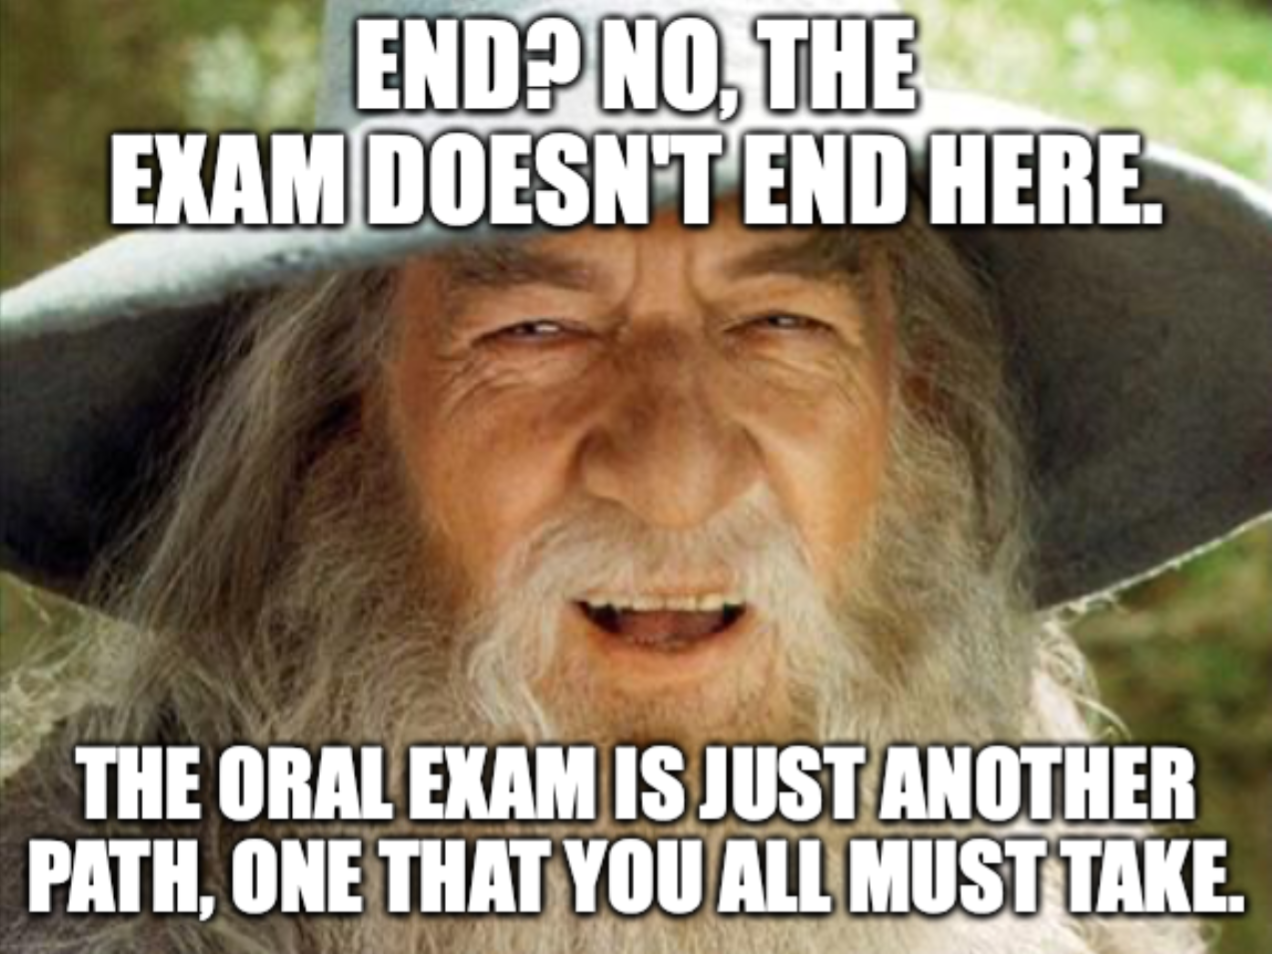


# Instructions for the homework
  > Follow the instructions in the notebook carefully
  


## General instructions
  * Do NOT remove ANYTHING that is already in the notebook.
  * Before you start, show the line number for the code cells:
    * Go to Tools -> Settings -> Editor -> show line numbers
  * Having **EXACTLY TWO** students per group is **MANDATORY**
  * The software must be commented.
  * The notebook will be converted to a PDF, so you must use prints and plots that are displayed in the derived PDF.
  * About this notebook:
    * Create a personal copy to be able to modify it: File > Save a copy in Drive
    * Rename the copied notebook `DMT2023-HW4.ipynb`


## Instructions for **code**:
  * DO NOT add code cells
  * DO NOT remove any code cells
  * Only edit the code cells containing the comment `#YOUR CODE STARTS HERE#`. Within those cells:
    * DO NOT remove ANYTHING that we have written (otherwise specified). In particular, the line `#REMOVE_OUTPUT#` is used in some cells to remove the output of those cells when the notebook is converted to PDF.
    * Add your code between line `#YOUR CODE STARTS HERE#` and line `#YOUR CODE ENDS HERE#`; **DO NOT REMOVE THESE COMMENTS**
    * The last line in each code cell is #THIS IS LINE \<TOT>#, where \<TOT> is a line number. The notebook is constructed so that \<TOT> matches with the line number in which it is written, but it may of course move as you add your code. **Make sure that, when you deliver it, that comment returns to line \<TOT>.** DO NOT CHANGE THE \<TOT> VALUE. Of course, this means that you have a limited number of lines of code that you may NOT exceed under any circumstances. On the other hand, if your code is shorter than that, you have to reach that line number with empty lines.

[comment]: <> (#REMOVE_CELL#)


## Instructions for **text**:
* DO NOT add text cells
* DO NOT remove text cells
* DO NOT modify the text cells we have created.
* Only edit text cells starting with the comment ------------YOUR TEXT STARTS HERE------------. Within those cells:
  * Do NOT remove anything we have entered.
  * **Add your own text after the line ------------YOUR TEXT STARTS HERE------------; DO NOT REMOVE THIS TEXT**
  * For each cell, a specific delivery will be given. If you are given a maximum number of sentences to write, both the dot "." and the semicolon ";" will be considered sentence dividers.

[comment]: <> (#REMOVE_CELL#)

## Group composition:

Write down the list of group members. The format should be Last Name, First Name, Student ID. Group members should be sorted alphabetically by surname and placed on different lines.
Example:

Becchetti, Luca, 123456

Siciliano, Federico, 987654

------------YOUR TEXT STARTS HERE------------

Fiorenza, Gianmarco, 2086296

Girolami, Mattia, 2076424



<div style="page-break-after: always; visibility: hidden"> 
\pagebreak
</div>

## Homework 4
The homework consists of two parts:

  1. Text Representation

  and

  2. Deep Learning

> Ensure that the notebook can be faithfully reproduced by anyone (hint: pseudo random number generation).

> If you need to set a random seed, set it to `709`.

> If multiple code cells are provided for a single part, it is **NOT** mandatory to use them all.

# Part 1
In this part of the homework, you have to deal with Text Representation.

Import **ALL** the Python packages that you need for Part 1.

In [ ]:
#REMOVE_OUTPUT#
!pip install --upgrade --no-cache-dir gdown
#YOUR CODE STARTS HERE#
!pip install -U sentence-transformers
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import random
import torch
import time
import nltk
import re

nltk.download('stopwords')
from sentence_transformers import SentenceTransformer
from sentence_transformers.util import cos_sim 
from sklearn.naive_bayes import GaussianNB
from tabulate import tabulate
#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Part 1.1
The company **F**antastic **S**olution sells products. Customers can leave product reviews on their platform. The company wants to classify the reviews into positive and negative.

Their requirements are unclear: they mention both accuracy and calculation time, but it is not known which is more important to them. :'(

They also forbid you to do a hyper-parameter optimisation.
(why? :O )

To help you (?), they have already pre-processed the data. They have translated each text into a random language.

The best thing to do is to provide them with a list of models that can best meet their (unclear) requirements.

### 1.1.1
Download the data from the Drive link (code already provided).

In [83]:
#REMOVE_OUTPUT#
!gdown 1X6QnCcOgnNEBQ1xnilmPWqDIs7bRrQof

Downloading...
From: https://drive.google.com/uc?id=1X6QnCcOgnNEBQ1xnilmPWqDIs7bRrQof
To: /content/FS_reviews.jsonl
100% 18.3M/18.3M [00:00<00:00, 185MB/s]


### 1.1.2
Understand (!) and pre-process *(general term!)* the data.
Divide the data according to your needs.

> No specific request


In [ ]:
#YOUR CODE STARTS HERE#


first_dataset = pd.read_json("FS_reviews.jsonl", lines = True)

# Filter and drop the rows where the text is equal to 'ERROR'
first_dataset = first_dataset[~first_dataset['review_text'].isin(['ERROR'])]

#random_indices = random.sample(range(len(first_dataset)), 8000)

#new_dataset = first_dataset.iloc[random_indices]

#dataset = new_dataset[['review_text', 'rating']]
dataset= first_dataset[['review_text', 'rating']]

# Set 0 to the negative reviews (rating less or equal to 3) and 1 to the positive reviews (rating greater than 3)
# In the EDA phase we noticed that there are no reviews with rating equal to 3
dataset.loc[dataset['rating'] <= 3, 'rating'] = 0
dataset.loc[dataset['rating'] > 3, 'rating'] = 1

x = dataset['review_text'].to_numpy()
y = dataset['rating'].to_numpy()
















#YOUR CODE ENDS HERE#
#THIS IS LINE 40#

In [ ]:
#YOUR CODE STARTS HERE#


# This function returns TRUE if the passed text is korean and FALSE otherwise
def is_korean(text):
  korean_pattern = re.compile(r'[\u3131-\u3163\uac00-\ud7a3]+')
  return bool(korean_pattern.match(text))































#YOUR CODE ENDS HERE#
#THIS IS LINE 40#

In [ ]:
#YOUR CODE STARTS HERE#

train_X, test_X, train_y, test_y = sklearn.model_selection.train_test_split(x, y, test_size=0.2, shuffle=True, random_state = 709)

tokenized_train_set = []
clean_train_sentences = []
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
stopwords_ = nltk.corpus.stopwords.words()


for i in train_X:

    # Remove all the special charachters from the words that contain them, remove words that contains numbers and finally lowercase everything.
    temp = [re.sub(r'\W+', '', j.lower()) for j in tokenizer.tokenize(i) if not re.search(r'\d', j.lower()) and j.lower() not in stopwords_]

    # Remove all the words with length less or equal to 2 execept for the korean ones.
    temp = [x for x in temp if len(x) > 2 or is_korean(x)]

    # We keep both the tokenized reviews and the reassembled ones.
    tokenized_train_set.append(temp)
    clean_train_sentences.append(' '.join(temp))
    
train_words_vocabulary = sorted(list(set([word for sentence in tokenized_train_set for word in sentence])))















#YOUR CODE ENDS HERE#
#THIS IS LINE 40#

Provide an explanation for your preprocessing *(general term!)*.

**Use at most 3 sentences.**

[comment]: <> (#SHOW_CELL#)

----------YOUR TEXT STARTS HERE----------

During the preprocessing phase, we implemented standard dataset exploration procedures and observed that many reviews consisted solely of the word **'ERROR'**, so we chose to drop them.

Additionally, we applied typical preprocessing procedures, such as removing stopwords, punctuation, numbers and special characters, tokenization, lowercasing, and excluding words shorter than 3 characters, except for Korean language words.


<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

### 1.1.3
Choose at least 1 and a maximum of 3 encodings. Encode the data.

> P.S. If you need it, Word2Vec has a version for Documents

In [ ]:
#YOUR CODE STARTS HERE#

all_sentences_embeddings, all_ranks = {}, {}

sentence_model_list = ['distiluse-base-multilingual-cased-v2' ,'paraphrase-multilingual-MiniLM-L12-v2', 'paraphrase-multilingual-mpnet-base-v2']

# In order to handle cosine similarity associated with the reviews more easily, we decided to arrange them within the data structure.
positive_sent, negative_sent = [], []

for i in range(len(clean_train_sentences)):
  if train_y[i] == 1:
    positive_sent.append(clean_train_sentences[i])
  else:
    negative_sent.append(clean_train_sentences[i])

ordered_clean_train_sentences = positive_sent + negative_sent

# Rearraning the labels for the ordered_clean_train_sentences 
numeric_labels = [1]*len(positive_sent) + [0]*len(negative_sent)






















#YOUR CODE ENDS HERE#
#THIS IS LINE 40#

In [ ]:
#YOUR CODE STARTS HERE#

# Perform the encoding for the 3 chosen models and save them in the all_sentences_embeddings dictionary.
time_dict ={}
for model_name in sentence_model_list:
  print(model_name)
  start_time = time.time()
  model = SentenceTransformer(model_name)
  embeddings = model.encode(ordered_clean_train_sentences, show_progress_bar = False)
  all_sentences_embeddings[model_name] = embeddings
  time_dict[model_name] =  (time.time() - start_time)



























#YOUR CODE ENDS HERE#
#THIS IS LINE 40#

distiluse-base-multilingual-cased-v2
paraphrase-multilingual-MiniLM-L12-v2


paraphrase-multilingual-mpnet-base-v2


In [ ]:
#YOUR CODE STARTS HERE#

for emb in all_sentences_embeddings.keys():
  sentence_embedding = all_sentences_embeddings[emb]

  all_cos_sims = np.array(cos_sim(sentence_embedding, sentence_embedding))
  all_cos_sims = torch.from_numpy(all_cos_sims)

  #all_cos_sims = -np.absolute(cos_sim(sentence_embedding, sentence_embedding))
  #all_cos_sims[0:len(positive_sent), 0:len(positive_sent)] *= -1
  #all_cos_sims[len(positive_sent): , len(positive_sent): ] *= -1

  rank = []
  
  upper_indices = torch.triu_indices(all_cos_sims.shape[0], all_cos_sims.shape[1], offset=1)
  upper_triangular = all_cos_sims[upper_indices[0], upper_indices[1]]

  rank = torch.mean(upper_triangular)
  all_ranks[emb] = rank.item()


  print(str(emb)+ '  --->  ' + str(rank.item()))
















#YOUR CODE ENDS HERE#
#THIS IS LINE 40#

distiluse-base-multilingual-cased-v2  --->  0.18067744374275208
paraphrase-multilingual-MiniLM-L12-v2  --->  0.21169856190681458
paraphrase-multilingual-mpnet-base-v2  --->  0.26897114515304565


Give a reason for your choices.

**Use at most 3 sentences.**

[comment]: <> (#SHOW_CELL#)

----------YOUR TEXT STARTS HERE----------

We chose the three models listed above because they appeared to be more suitable for our dataset as all three handle sentences in multiple languages.

 Additionally, we attempted to apply other models, but the chosen ones provided better results.
 
The other SentenceTransforming models yielded low scores, while attempting WordEmbedding led to incorrect classification (overfitting for positivity, as the dataset is imbalanced).

<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

### 1.1.4
Choose **ONE** classifier for **EACH** encoding. Train the classifiers.

In [ ]:
#YOUR CODE STARTS HERE#

class_weights = sklearn.utils.class_weight.compute_class_weight(class_weight = 'balanced', classes = np.unique(numeric_labels), y = numeric_labels)

model_1 = SentenceTransformer('distiluse-base-multilingual-cased-v2')
test_embeddings_model_1 = model_1.encode(test_X)

svm_model_1 = sklearn.svm.SVC(kernel='linear', class_weight=dict(enumerate(class_weights)), probability=True)
svm_model_1.fit(all_sentences_embeddings['distiluse-base-multilingual-cased-v2'], numeric_labels)





























#YOUR CODE ENDS HERE#
#THIS IS LINE 40#

SVC(class_weight={0: 2.509555189456343, 1: 0.6244056402688966}, kernel='linear',
    probability=True)

In [ ]:
#YOUR CODE STARTS HERE#

model_2 = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')
test_embeddings_model_2 = model_2.encode(test_X)

svm_model_2 = sklearn.svm.SVC(kernel='linear', class_weight=dict(enumerate(class_weights)), probability=True)
svm_model_2.fit(all_sentences_embeddings['paraphrase-multilingual-MiniLM-L12-v2'], numeric_labels)































#YOUR CODE ENDS HERE#
#THIS IS LINE 40#

SVC(class_weight={0: 2.509555189456343, 1: 0.6244056402688966}, kernel='linear',
    probability=True)

In [ ]:
#YOUR CODE STARTS HERE#

model_3 = SentenceTransformer('paraphrase-multilingual-mpnet-base-v2')
test_embeddings_model_3 = model_3.encode(test_X)

svm_model_3 = sklearn.svm.SVC(kernel='linear', class_weight=dict(enumerate(class_weights)), probability=True)
svm_model_3.fit(all_sentences_embeddings['paraphrase-multilingual-mpnet-base-v2'], numeric_labels)































#YOUR CODE ENDS HERE#
#THIS IS LINE 40#

SVC(class_weight={0: 2.509555189456343, 1: 0.6244056402688966}, kernel='linear',
    probability=True)

Provide a justification for your choices.

**Use at most 3 sentences.**

[comment]: <> (#SHOW_CELL#)

----------YOUR TEXT STARTS HERE----------

We tried various classifiers (RandomForest, Naive-Bayes, Logistic Regression, etc.) and, based on the metrics, we opted for the same classifier, SVM, for all three encodings.

The other classifiers, despite the *'weights'* parameter, tend to overfit towards positive reviews (again, due to the heavily imbalanced dataset).


<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

### 1.1.5
Obtain the metrics you want to show the company.

In [ ]:
#YOUR CODE STARTS HERE#

predicted_classes_svm_model_1 = svm_model_1.predict(test_embeddings_model_1)

precision_svm_model_1 = sklearn.metrics.precision_score(test_y, predicted_classes_svm_model_1, average = 'weighted')
recall_svm_model_1 = sklearn.metrics.recall_score(test_y, predicted_classes_svm_model_1, average = 'weighted')
f1_svm_model_1 =  sklearn.metrics.f1_score(test_y, predicted_classes_svm_model_1, average = 'weighted')

conf_mat_svm_model_1 = sklearn.metrics.confusion_matrix(test_y, predicted_classes_svm_model_1)

thresholds = np.linspace(0, 1, num=100)

predicted_class_prob_model_1 = svm_model_1.predict_proba(test_embeddings_model_1)
positive_class_probabilities_model_1 = predicted_class_prob_model_1[:, 1]

tpr_model_1 = []  
fpr_model_1 = []

for threshold in thresholds:

    y_pred = [1 if prob > threshold else 0 for prob in positive_class_probabilities_model_1]

    TP = sum((y_pred[i] == 1) and (test_y[i] == 1) for i in range(len(y_pred)))
    FP = sum((y_pred[i] == 1) and (test_y[i] == 0) for i in range(len(y_pred)))
    TN = sum((y_pred[i] == 0) and (test_y[i] == 0) for i in range(len(y_pred)))
    FN = sum((y_pred[i] == 0) and (test_y[i] == 1) for i in range(len(y_pred)))

    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)

    tpr_model_1.append(TPR)
    fpr_model_1.append(FPR)






#YOUR CODE ENDS HERE#
#THIS IS LINE 40#

In [ ]:
#YOUR CODE STARTS HERE#

predicted_classes_svm_model_2 = svm_model_2.predict(test_embeddings_model_2)

precision_svm_model_2 = sklearn.metrics.precision_score(test_y, predicted_classes_svm_model_2, average = 'weighted')
recall_svm_model_2 = sklearn.metrics.recall_score(test_y, predicted_classes_svm_model_2, average = 'weighted')
f1_svm_model_2 =  sklearn.metrics.f1_score(test_y, predicted_classes_svm_model_2, average = 'weighted')

conf_mat_svm_model_2 = sklearn.metrics.confusion_matrix(test_y, predicted_classes_svm_model_2)


predicted_class_prob_model_2 = svm_model_2.predict_proba(test_embeddings_model_2)
positive_class_probabilities_model_2 = predicted_class_prob_model_2[:, 1]

tpr_model_2 = []  
fpr_model_2 = []

for threshold in thresholds:

    y_pred = [1 if prob > threshold else 0 for prob in positive_class_probabilities_model_2]

    TP = sum((y_pred[i] == 1) and (test_y[i] == 1) for i in range(len(y_pred)))
    FP = sum((y_pred[i] == 1) and (test_y[i] == 0) for i in range(len(y_pred)))
    TN = sum((y_pred[i] == 0) and (test_y[i] == 0) for i in range(len(y_pred)))
    FN = sum((y_pred[i] == 0) and (test_y[i] == 1) for i in range(len(y_pred)))

    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)

    tpr_model_2.append(TPR)
    fpr_model_2.append(FPR)







#YOUR CODE ENDS HERE#
#THIS IS LINE 40#

In [ ]:
#YOUR CODE STARTS HERE#

predicted_classes_svm_model_3 = svm_model_3.predict(test_embeddings_model_3)

precision_svm_model_3 = sklearn.metrics.precision_score(test_y, predicted_classes_svm_model_3, average = 'weighted')
recall_svm_model_3 = sklearn.metrics.recall_score(test_y, predicted_classes_svm_model_3, average = 'weighted')
f1_svm_model_3 =  sklearn.metrics.f1_score(test_y, predicted_classes_svm_model_3, average = 'weighted')

conf_mat_svm_model_3 = sklearn.metrics.confusion_matrix(test_y, predicted_classes_svm_model_3)

predicted_class_prob_model_3 = svm_model_3.predict_proba(test_embeddings_model_3)
positive_class_probabilities_model_3 = predicted_class_prob_model_3[:, 1]

tpr_model_3 = []
fpr_model_3 = []

for threshold in thresholds:

    y_pred = [1 if prob > threshold else 0 for prob in positive_class_probabilities_model_3]

    TP = sum((y_pred[i] == 1) and (test_y[i] == 1) for i in range(len(y_pred)))
    FP = sum((y_pred[i] == 1) and (test_y[i] == 0) for i in range(len(y_pred)))
    TN = sum((y_pred[i] == 0) and (test_y[i] == 0) for i in range(len(y_pred)))
    FN = sum((y_pred[i] == 0) and (test_y[i] == 1) for i in range(len(y_pred)))

    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)

    tpr_model_3.append(TPR)
    fpr_model_3.append(FPR)








#YOUR CODE ENDS HERE#
#THIS IS LINE 40#

Provide a rationale for the choice of metrics.

**Use at most 3 sentences.**

[comment]: <> (#SHOW_CELL#)

----------YOUR TEXT STARTS HERE----------

We have opted for the selection of numerous metrics, including the most common and informative ones, as they showcase different nuances of our models' performance.

Specifically, since the *precision*, *recall*, and *F1* values are satisfactory for all three models, we decided to include the confusion matrix for further clarification.

Lastly, we chose to depict the performance of the three models by utilizing *ROC curves*.

<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

### 1.1.6
Provide the company with all the information it needs to choose the pipeline it prefers.

+---------+---------------------------------------+---------------------------+-------------+----------+------------+--------------------+------------------+
|         |              Model Name               |        Classifier         |   Precision |   Recall |   F1 Score |  Confusion Matrix  |   Execution Time |
+=========+=======================================+===========================+=============+==========+============+====================+==================+
| Model 1 | distiluse-base-multilingual-cased-v2  | Support Vector Classifier |    0.864439 | 0.822788 |   0.835151 |    [[ 586  148]    |          47.8271 |
|         |                                       |                           |             |          |            |    [ 527 2548]]    |                  |
+---------+---------------------------------------+---------------------------+-------------+----------+------------+--------------------+------------------+
| Model 2 | paraphrase-multilingual-MiniLM-L12-v2 | 

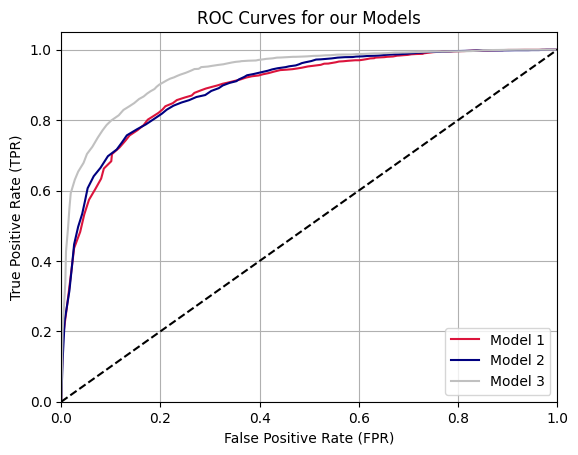

In [ ]:
#YOUR CODE STARTS HERE#

data = [
    ["Model 1",  "distiluse-base-multilingual-cased-v2", " Support Vector Classifier", precision_svm_model_1, recall_svm_model_1, f1_svm_model_1, conf_mat_svm_model_1, time_dict["distiluse-base-multilingual-cased-v2"]],
    ["Model 2", "paraphrase-multilingual-MiniLM-L12-v2", " Support Vector Classifier", precision_svm_model_2, recall_svm_model_2, f1_svm_model_2, conf_mat_svm_model_2, time_dict["paraphrase-multilingual-MiniLM-L12-v2"]],
    ["Model 3", "paraphrase-multilingual-mpnet-base-v2", " Support Vector Classifier", precision_svm_model_3, recall_svm_model_3, f1_svm_model_3, conf_mat_svm_model_3, time_dict["paraphrase-multilingual-mpnet-base-v2"]]
]

headers = ["", "Model Name", "Classifier", "Precision", "Recall", "F1 Score", "Confusion Matrix", "Execution Time"]
table = tabulate(data, headers, tablefmt="grid", stralign = 'center')

print(table)
print()


plt.plot(fpr_model_1, tpr_model_1, label = 'Model 1', color='crimson')
plt.plot(fpr_model_2, tpr_model_2, label = 'Model 2', color='navy')
plt.plot(fpr_model_3, tpr_model_3, label = 'Model 3', color='silver')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend()
plt.grid()
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for our Models')
plt.show()











#YOUR CODE ENDS HERE#
#THIS IS LINE 40#

Describe what you have supplied and why.

**Use at most 3 sentences.**

[comment]: <> (#SHOW_CELL#)

----------YOUR TEXT STARTS HERE----------

We have decided to suggest three different versions of classifiers.

Although they all use the same classifier, the difference among the three lies in the choice of encoding, which will yield relatively similar results but vary in terms of accuracy and running time.

Therefore, we have chosen to provide the company with a table containing the values of the obtained metrics, along with an overlaid graph of the three models, highlighting the differences as the True and False Positive Rates vary.


Also, explain how the company could decide between the classifiers you have produced.

**Use at most 3 sentences.**

[comment]: <> (#SHOW_CELL#)

----------YOUR TEXT STARTS HERE----------

The company, in choosing the model, will need to consider two main factors: the time required for the encoding phase on one hand, and the accuracy of the classifier on the other.

The first two models indeed have shorter execution times at the expense of poorer classification performance (as evident from the corresponding confusion matrix).

Simultaneously, the third model, despite taking more time, is more precise.


<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

## Part 1.2

### 1.2.1
Consider a scenario in which you have a set of words.

These must be transformed into a representation suitable for Machine Learning.

However, each representation has a fixed limit $K$.

Comment on how 3 word representations would behave in this scenario.

**Use at most 3 sentences.**

----------YOUR TEXT STARTS HERE----------

Depending on the chosen approach, using *Bag-of-Words* or *TF-IDF* with a fixed limit **$K$** for word representation results in information loss.

If opting for *Word Embedding*, the maximum vector dimension can be set to **$K$**, or if the existing vector representation has a higher dimension, it can be reduced to **$K$** using **PCA**.

While there is still a "small" loss of information, it is the best way to minimize it.


<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

# Part 2
In this part of the homework, you have to deal with Deep Learning.

Import here **ALL** the Python packages that you need for Part 2.

In [82]:
#REMOVE_OUTPUT#
#YOUR CODE STARTS HERE#
!pip install portalocker>=2.0.0
!pip install torchdata
import pandas as pd 
import numpy as np
import regex as re
import torch
import time
import nltk
nltk.download('stopwords')
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from torchtext.data.functional import to_map_style_dataset
from torchtext.vocab import build_vocab_from_iterator
from sklearn.model_selection import train_test_split 
from torch.utils.data.dataset import random_split
from torchtext.data.utils import get_tokenizer
from torch.utils.data import DataLoader
#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Part 2.1
You have to use the same data as in Part 1, but you can use whatever adjustments you have made to it (only Part 1.1.2).

### 2.1.1
Prepare the data structures you will need.

In [112]:
#YOUR CODE STARTS HERE#

def is_korean(text):
    korean_pattern = re.compile(r'[\u3131-\u3163\uac00-\ud7a3]+')
    return bool(korean_pattern.match(text))

first_dataset = pd.read_json("FS_reviews.jsonl", lines = True)
first_dataset = first_dataset[~first_dataset['review_text'].isin(['ERROR'])]
dataset= first_dataset[['review_text', 'rating']]

dataset.loc[dataset['rating'] <= 3, 'rating'] = 0       
dataset.loc[dataset['rating'] > 3, 'rating'] = 1
#let's balaced the dataset
np.random.seed(709)
positive_indices = dataset[dataset['rating'] == 1].index
sampled_majority_indices = np.random.choice(positive_indices, size=(len(dataset)-len(positive_indices)), replace=False)
df_balanced = dataset.drop(set(positive_indices) - set(sampled_majority_indices))
dataset = df_balanced
x = dataset['review_text'].to_numpy()
y = dataset['rating'].to_numpy()

train_X, test_X, train_y, test_y = train_test_split(x, y, test_size=0.2, shuffle=True, random_state = 709)

clean_train_sentences = []
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
stopwords_ = nltk.corpus.stopwords.words()

for i in train_X:

    # Remove all the special charachters from the words that contain them and also remove words that contains numbers and finally lowercase everything.
    temp = [re.sub(r'\W+', '', j.lower()) for j in tokenizer.tokenize(i) if not re.search(r'\d', j.lower()) and j.lower() not in stopwords_]
    # Remove all the words with length less or equal to 2 execept for the korean ones.
    temp = [x for x in temp if len(x) > 2 or is_korean(x)]

    clean_train_sentences.append(' '.join(temp))

train_dataset = pd.DataFrame({'rating': train_y, 'review_text': clean_train_sentences})
test_dataset = pd.DataFrame({'rating': test_y, 'review_text': test_X})
#YOUR CODE ENDS HERE#
#THIS IS LINE 40#

In [113]:
#YOUR CODE STARTS HERE#

def yield_tokens(data_iter):
    for _, text in data_iter:
        yield tokenizer.tokenize(text)

def collate_batch(batch):
    label_list, text_list, offsets = [], [], [0]
    for (_label, _text) in batch:
         label_list.append(int(_label))
         processed_text = torch.tensor(text_pipeline(_text), dtype=torch.int64)
         text_list.append(processed_text)
         offsets.append(processed_text.size(0))
    label_list = torch.tensor(label_list, dtype=torch.int64)
    offsets = torch.tensor(offsets[:-1]).cumsum(dim=0)
    text_list = torch.cat(text_list)
    return label_list.to(device), text_list.to(device), offsets.to(device)





















#YOUR CODE ENDS HERE#
#THIS IS LINE 40#

In [114]:
#YOUR CODE STARTS HERE#


train_iter = ((row['rating'], row['review_text']) for _, row in train_dataset.iterrows())

tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')

vocab = build_vocab_from_iterator(yield_tokens(train_iter), specials=["<unk>"])
vocab.set_default_index(vocab["<unk>"])

text_pipeline = lambda x: vocab(tokenizer.tokenize(x))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

dataloader = DataLoader(train_dataset.values, batch_size=8, shuffle=True, collate_fn=collate_batch)























#YOUR CODE ENDS HERE#
#THIS IS LINE 40#

Briefly explain relevant parts of your code.

**Use at most 3 sentences.**

[comment]: <> (#SHOW_CELL#)

----------YOUR TEXT STARTS HERE----------

We performed the same preprocessing on the data as in part 1 of the homework and merged the two train and test datasets to transform them into iterable objects, required for the execution of the *DataLoader* function.

Additionally, we chose to use the NLTK tokenizer instead of the one provided by PyTorch, as we have a multilingual dataset.

Lastly, we defined the *text_pipeline* using the tokenizer mentioned above.


<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

### 2.1.2
Define your model

In [115]:
#YOUR CODE STARTS HERE#

class TextClassificationModel(torch.nn.Module):

    def __init__(self, vocab_size, embed_dim, num_class):
        super(TextClassificationModel, self).__init__()
        self.embedding = torch.nn.EmbeddingBag(vocab_size, embed_dim, sparse=False)
        self.fc = torch.nn.Linear(embed_dim, num_class)
        self.init_weights()

    def init_weights(self):
        initrange = 0.5
        self.embedding.weight.data.uniform_(-initrange, initrange)
        self.fc.weight.data.uniform_(-initrange, initrange)
        self.fc.bias.data.zero_()

    def forward(self, text, offsets):
        embedded = self.embedding(text, offsets)
        return self.fc(embedded)



















#YOUR CODE ENDS HERE#
#THIS IS LINE 40#

In [116]:
#YOUR CODE STARTS HERE#

vocab_size = len(vocab)
emb_size = 64
model = TextClassificationModel(vocab_size, emb_size, num_class = 2).to(device)

































#YOUR CODE ENDS HERE#
#THIS IS LINE 40#

Briefly explain relevant parts of your code.

**Use at most 3 sentences.**

[comment]: <> (#SHOW_CELL#)

----------YOUR TEXT STARTS HERE----------

The *TextClassificationModel* class, which inherits from the torch.nn.Module, utilizes an EmbeddingBag layer to calculate means of word embeddings and than the linear layer (torch.nn.Linear), during the forward pass, performs the classification. 


<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

### 2.1.3
Train and optimize your model

In [117]:
#YOUR CODE STARTS HERE#

def train(dataloader, regularization = False):
    model.train()
    total_acc, total_count = 0, 0
    log_interval = 20
    start_time = time.time()
    lambda_ = 0.001

    for idx, (label, text, offsets) in enumerate(dataloader):
        optimizer.zero_grad()
        predicted_label = model(text, offsets)
        loss = criterion(predicted_label, label)

        if regularization == True: 
          l1_regularization = lambda_ * sum(abs(param).sum() for param in model.parameters())
          l2_regularization = lambda_ * sum((param**2).sum() for param in model.parameters())
          loss += (l1_regularization + l2_regularization)

        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.1)
        optimizer.step()
        total_acc += (predicted_label.argmax(1) == label).sum().item()
        total_count += label.size(0)
        if idx % log_interval == 0 and idx > 0 :
            elapsed = time.time() - start_time
            if regularization == True:
              print('| epoch {:3d} | {:5d}/{:5d} batches '
                    '| accuracy {:8.3f}'.format(epoch, idx, len(dataloader),
                                                total_acc/total_count))
            total_acc, total_count = 0, 0
            start_time = time.time()





#YOUR CODE ENDS HERE#
#THIS IS LINE 40#

In [118]:
#YOUR CODE STARTS HERE#

def evaluate(dataloader):
    model.eval()
    total_acc, total_count = 0, 0

    with torch.no_grad():
        for idx, (label, text, offsets) in enumerate(dataloader):
            predicted_label = model(text, offsets)
            loss = criterion(predicted_label, label)
            total_acc += (predicted_label.argmax(1) == label).sum().item()
            total_count += label.size(0)

    return total_acc/total_count
























#YOUR CODE ENDS HERE#
#THIS IS LINE 40#

In [119]:
#YOUR CODE STARTS HERE#
EPOCHS = 10
LR = 0.5
BATCH_SIZE = 80

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LR)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.33)

total_accu = None

train_iter = train_dataset.values
test_iter = test_dataset.values
train_dataset_ = to_map_style_dataset(train_iter)
test_dataset_ = to_map_style_dataset(test_iter)

num_train = int(len(train_dataset_) * 0.95)
split_train_, split_valid_ =\
                             random_split(train_dataset_, [num_train, len(train_dataset_) - num_train])

train_dataloader = DataLoader(split_train_, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_batch)
valid_dataloader = DataLoader(split_valid_, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_batch)
test_dataloader = DataLoader(test_dataset_, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_batch)

for epoch in range(1, EPOCHS + 1):
    epoch_start_time = time.time()
    train(train_dataloader, regularization = True)
    accu_val = evaluate(valid_dataloader)
    if total_accu is not None and total_accu > accu_val:
      scheduler.step()
    else:
       total_accu = accu_val
    print('-' * 59)
    print('| end of epoch {:3d} | time: {:5.2f}s | '
          'valid accuracy {:8.3f} '.format(epoch,
                                           time.time() - epoch_start_time,
                                           accu_val))
    print('-' * 59)
#YOUR CODE ENDS HERE#
#THIS IS LINE 40#

| epoch   1 |    20/   72 batches | accuracy    0.485
| epoch   1 |    40/   72 batches | accuracy    0.507
| epoch   1 |    60/   72 batches | accuracy    0.507
-----------------------------------------------------------
| end of epoch   1 | time:  0.48s | valid accuracy    0.520 
-----------------------------------------------------------
| epoch   2 |    20/   72 batches | accuracy    0.513
| epoch   2 |    40/   72 batches | accuracy    0.499
| epoch   2 |    60/   72 batches | accuracy    0.496
-----------------------------------------------------------
| end of epoch   2 | time:  0.47s | valid accuracy    0.510 
-----------------------------------------------------------
| epoch   3 |    20/   72 batches | accuracy    0.498
| epoch   3 |    40/   72 batches | accuracy    0.491
| epoch   3 |    60/   72 batches | accuracy    0.504
-----------------------------------------------------------
| end of epoch   3 | time:  0.48s | valid accuracy    0.510 
-------------------------------

Briefly explain relevant parts of your code.

**Use at most 3 sentences.**

[comment]: <> (#SHOW_CELL#)

----------YOUR TEXT STARTS HERE----------

During the training phase, we selected cross-entropy loss as the loss function, stochastic gradient descent as the optimizer, and PyTorch's step learning rate optimizer, which allows updating the learning rate at specified epoch intervals.

We extracted a validation set from the training set (5%) and set the batch size of the dataloader to 80.

In an attempt to handle the dataset imbalance, we also added L1 and L2 regularization parameters.

<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

### 2.1.4
Show the performance of your model

In [120]:
#YOUR CODE STARTS HERE#

def performance_evaluate(dataloader):
    model.eval()
    total_acc = 0
    total_count = 0
    true_labels = []
    predicted_labels = []

    with torch.no_grad():
        for idx, (label, text, offsets) in enumerate(dataloader):
            predicted_label = model(text, offsets)
            loss = criterion(predicted_label, label)

            total_acc += (predicted_label.argmax(1) == label).sum().item()
            total_count += label.size(0)

            true_labels.extend(label.tolist())
            predicted_labels.extend(predicted_label.argmax(1).tolist())

    accuracy = total_acc / total_count
    precision = precision_score(true_labels, predicted_labels, average='macro')
    recall = recall_score(true_labels, predicted_labels, average='macro')
    confusion = confusion_matrix(true_labels, predicted_labels)

    return accuracy, precision, recall, confusion












#YOUR CODE ENDS HERE#
#THIS IS LINE 40#

In [121]:
#YOUR CODE STARTS HERE#
from tabulate import tabulate
accuracy, precision, recall, confusion =  performance_evaluate(test_dataloader)

def print_performance(accuracy, precision, recall, confusion, EPOCHS, LR, BATCH_SIZE):
  data = [["torch.nn.CrossEntropyLoss",  "Stochastic gradient descent", EPOCHS, LR, BATCH_SIZE, accuracy, precision, recall, confusion]]

  headers = ["criterion", "optimizer", "# EPOCHS", "Learning-Rate", "Batch-Size", "Accuracy", "Precision", "Recall", "Confusion Matrix"]

  table = tabulate(data, headers, tablefmt="grid", stralign = 'center')

  print(table)



print_performance(accuracy, precision, recall, confusion, EPOCHS, LR, BATCH_SIZE)






















#YOUR CODE ENDS HERE#
#THIS IS LINE 40#

+---------------------------+-----------------------------+------------+-----------------+--------------+------------+-------------+----------+--------------------+
|         criterion         |          optimizer          |   # EPOCHS |   Learning-Rate |   Batch-Size |   Accuracy |   Precision |   Recall |  Confusion Matrix  |
+===========================+=============================+============+=================+==============+============+=============+==========+====================+
| torch.nn.CrossEntropyLoss | Stochastic gradient descent |         10 |             0.5 |           80 |   0.490716 |    0.455702 | 0.479511 |     [[ 82 649]     |
|                           |                             |            |                 |              |            |             |          |     [119 658]]     |
+---------------------------+-----------------------------+------------+-----------------+--------------+------------+-------------+----------+--------------------+


In [122]:
#YOUR CODE STARTS HERE#





































#YOUR CODE ENDS HERE#
#THIS IS LINE 40#

Briefly explain relevant parts of your code.

**Use at most 3 sentences.**

[comment]: <> (#SHOW_CELL#)

----------YOUR TEXT STARTS HERE----------

For performance evaluation, the usual metrics for classification evaluation were selected. Specifically, the previous evaluate function was handled and modified to also extract the necessary metrics.

<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

### 2.1.5
Provide an ablation study on at least one and at most three parameters.

In [123]:
#YOUR CODE STARTS HERE#
EPOCHS = 10
BATCH_SIZE =  [ 32, 64, 80, 96]
LR = [ 0.5, 1, 5]

for learn_rate in LR:
  for batch in BATCH_SIZE:
    print("Learning rate: " + str(learn_rate))
    print("Batch size: " + str(batch) + '\n')

    model = TextClassificationModel(vocab_size, emb_size, num_class = 2).to(device)
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learn_rate)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.33)
    total_accu = None
    num_train = int(len(train_dataset_) * 0.95)
    split_train_, split_valid_ = random_split(train_dataset_, [num_train, len(train_dataset_) - num_train])

    train_dataloader = DataLoader(split_train_, batch_size=batch, shuffle=True, collate_fn=collate_batch)
    valid_dataloader = DataLoader(split_valid_, batch_size=batch, shuffle=True, collate_fn=collate_batch)
    test_dataloader = DataLoader(test_dataset_, batch_size=batch, shuffle=True, collate_fn=collate_batch)

    for epoch in range(1, EPOCHS + 1):
        epoch_start_time = time.time()
        train(train_dataloader)
        accu_val = evaluate(valid_dataloader)
        if total_accu is not None and total_accu > accu_val:
          scheduler.step()
        else:
          total_accu = accu_val
        if epoch == EPOCHS:
          print('-' * 59)
          print('| end of epoch {:3d} | time: {:5.2f}s | ' 'valid accuracy {:8.3f} '.format(epoch, time.time() - epoch_start_time, accu_val))
          print('-' * 59)
          accuracy, precision, recall, confusion =  performance_evaluate(test_dataloader)
          print("performance on test set:")
          print_performance(accuracy, precision, recall, confusion, EPOCHS, learn_rate, batch)
    print()
#YOUR CODE ENDS HERE#
#THIS IS LINE 40#

Learning rate: 0.5
Batch size: 32

-----------------------------------------------------------
| end of epoch  10 | time:  0.58s | valid accuracy    0.619 
-----------------------------------------------------------
performance on test set:
+---------------------------+-----------------------------+------------+-----------------+--------------+------------+-------------+----------+--------------------+
|         criterion         |          optimizer          |   # EPOCHS |   Learning-Rate |   Batch-Size |   Accuracy |   Precision |   Recall |  Confusion Matrix  |
+===========================+=============================+============+=================+==============+============+=============+==========+====================+
| torch.nn.CrossEntropyLoss | Stochastic gradient descent |         10 |             0.5 |           32 |   0.525862 |     0.64377 | 0.538925 |     [[707  24]     |
|                           |                             |            |                 |         

In [124]:
#YOUR CODE STARTS HERE#





































#YOUR CODE ENDS HERE#
#THIS IS LINE 40#

In [125]:
#YOUR CODE STARTS HERE#




































#YOUR CODE ENDS HERE#
#THIS IS LINE 40#

Comment the ablation study.

**Use at most 3 sentences.**

[comment]: <> (#SHOW_CELL#)

----------YOUR TEXT STARTS HERE----------

In the ablation study, we chose to focus on the batch size and learning rate parameters.

Specifically, unlike before, we decided to disregard the regularization factor as it had a significant impact on the quality of results.

Upon observing the outcomes, it is evident that the optimal combination of *learning rate* and *batch size* is 5 and 64, respectively.

<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

## Part 2.2

### 2.2.1
How would a Deep Learning model (of the kind we have seen) behave in the case where a word was never seen during training?
Answer on both practical and theoretical aspects.

**Use at most 3 sentences.**

----------YOUR TEXT STARTS HERE----------

When a model comes across a word during testing that it has never seen before, it pratically can employ methods like using special tokens for unknown words or breaking words into smaller units.

However, theorically the model's capacity to understand for unseen words is restricted since it lacks explicit knowledge of those words.
The model's behavior is determined by its architecture and its ability to infer meaning from context or make generalizations based on existing information.

<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>


# Submission instructions

Follow the instructions precisely
1. Run the whole notebook up to this point
  * Click on this text cell and go to Runtime > Run before
  * It is essential that the notebook can be run from start to finish without us having to change anything.
2. Download the current notebook
  * File -> Download -> Download .ipynb
3. Upload the downloaded notebook in the current runtime
  * In the left sidebar menu, open the last tab (Files)
  * Click on the first button under the File title (Page with arrow pointing up)
  * In the new window, upload the notebook just downloaded



4. To turn the notebook into a pdf you need to install a Tex extension: run the next cell of code:

In [126]:
#REMOVE_CELL#
!apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 javascript-common libapache-pom-java
  libcommons-logging-java libcommons-parent-java libfontbox-java libfontenc1
  libgs9 libgs9-common libharfbuzz-icu0 libidn11 libijs-0.35 libjbig2dec0
  libjs-jquery libkpathsea6 libpdfbox-java libptexenc1 libruby2.7 libsynctex2
  libteckit0 libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-minitest ruby-net-telnet
  ruby-power-assert ruby-test-unit ruby-xmlrpc ruby2.7 rubygems-integration
  t1utils teckit tex-common tex-gyre texlive-base texlive-binaries
  texlive-latex-base texlive-latex-extra texlive-latex-recommended
  texlive-pictures tipa xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf

5. Now, run the next cell to set some cell tags in the notebook file.

In [127]:
#REMOVE_CELL#
import nbformat as nbf
from glob import glob
notebooks = glob("/content/**/*.ipynb", recursive=True)

text_search_dict = ["YOUR TEXT STARTS HERE","#YOUR CODE STARTS HERE#"]

for ipath in notebooks:
    print(ipath)
    ntbk = nbf.read(ipath, nbf.NO_CONVERT)

    for cell in ntbk.cells:
        cell_type = cell['cell_type'] == "code"
      
        cell_tags = cell.get('metadata', {}).get('tags', [])
        cell_tags = set(cell_tags)

        if cell_type == 0: #markdown
          if (cell['source'][0]!="#" and text_search_dict[cell_type] not in cell['source'] and "pagebreak" not in cell['source']) or "#REMOVE_CELL#" in cell['source']:
            cell_tags.add("remove_cell")

        else: #code
          #if text_search_dict[cell_type] not in cell['source'] or "#REMOVE_CELL#" in cell['source']:
          if "#REMOVE_CELL#" in cell['source']:
            cell_tags.add("remove_cell")
          elif "#REMOVE_OUTPUT#" in cell['source']:
            cell_tags.add("remove_output")
        
        if len(cell_tags) > 0:
            cell['metadata']['tags'] = list(cell_tags)

    nbf.write(ntbk, ipath)

6. Now, run the next cell to transform the notebook to PDF without the code cells.
  * The file will appear in the menu on the left (refresh if needed). The file should be named `DMT2023_HW4.pdf`
  * Rename this file **Surname1_Surname2_DMT2023_HW4_report.pdf** (e.g. Becchetti_Siciliano_DMT2023_HW4_report.pdf). Sort the surnames alphabetically.
  * Click on it and using the right button or the three dots at its side, click on download to transfer it to your local PC
  

In [128]:
#REMOVE_CELL#
!jupyter nbconvert /content/DMT2023_HW4.ipynb --to pdf --TagRemovePreprocessor.remove_cell_tags='{"remove_cell"}' -TagRemovePreprocessor.remove_all_outputs_tags='{"remove_output"}'

[NbConvertApp] WARNING | pattern '/content/DMT2023_HW4.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--ex

7. Now, rename the downloaded notebook **Surname1_Surname2_DMT2023_HW4_notebook.ipynb** (e.g. Becchetti_Siciliano_DMT2023_HW4_notebook.ipynb). Sort the surnames alphabetically.

8. Now that you have both files, you need to upload them to Classroom. Only the student with the surname that comes first in alphabetical order **must** upload the files. Only the files uploaded by this student will be graded.